# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
G1 = nx.read_gpickle("assets/A4_P1_G1")
G2 = nx.read_gpickle("assets/A4_P1_G2")
G3 = nx.read_gpickle("assets/A4_P1_G3")
G4 = nx.read_gpickle("assets/A4_P1_G4")
G5 = nx.read_gpickle("assets/A4_P1_G5")
P1_Graphs = [G1, G2, G3, G4, G5]

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs using any methodology and determine which of the three algorithms generated each graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_degree_distribution(G):
    degrees = [d for n, d in G.degree()]
    plt.hist(degrees, bins=range(min(degrees), max(degrees)+1), alpha=0.75, edgecolor='black', density=True)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.show()
    
def measures(G):
    clustering_coeff = nx.average_clustering(G)
    avg_path_length = nx.average_shortest_path_length(G)
    betweenness = nx.betweenness_centrality(G)
    
    print(f"Average Clustering Coefficient of {G}: {clustering_coeff}")
    print(f"Average Path Length of {G}: {avg_path_length}")
    print(f"Betweenness Centrality (mean) of {G}: {np.mean(list(betweenness.values()))}")
    print("")

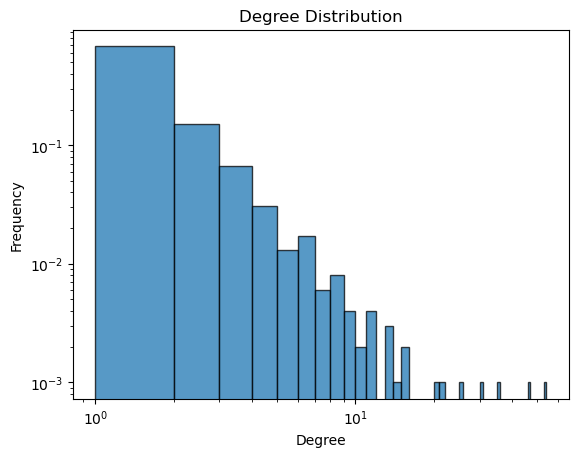

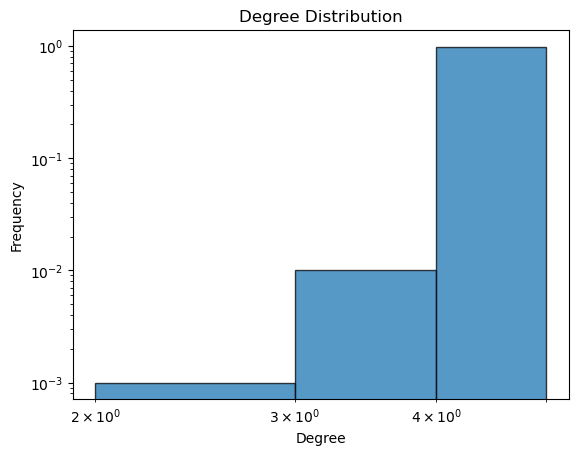

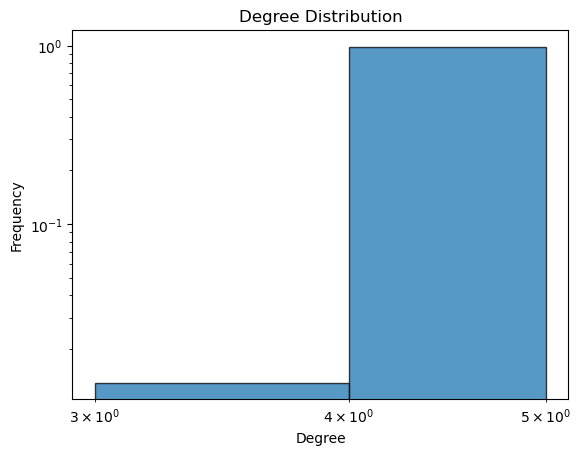

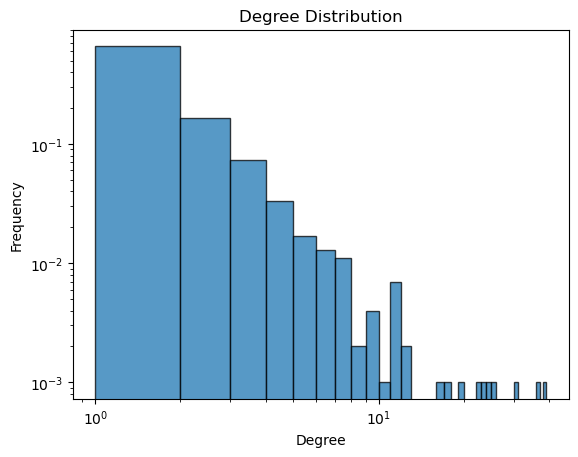

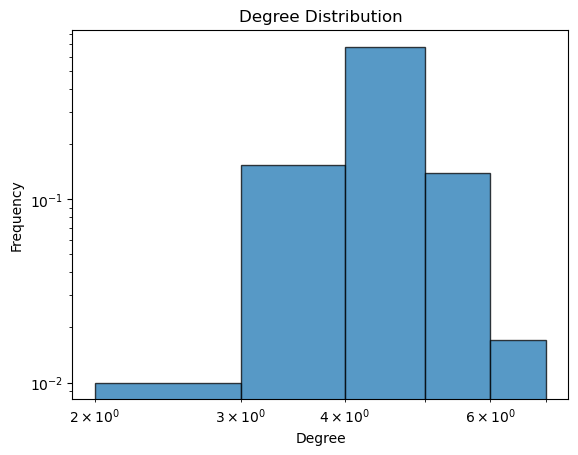

In [4]:
for G in P1_Graphs:
    plot_degree_distribution(G)

In [5]:
for G in P1_Graphs:
    measures(G)

Average Clustering Coefficient of Graph with 1000 nodes and 999 edges: 0.0
Average Path Length of Graph with 1000 nodes and 999 edges: 6.530506506506507
Betweenness Centrality (mean) of Graph with 1000 nodes and 999 edges: 0.005541589685878263

Average Clustering Coefficient of Graph with 1000 nodes and 2000 edges: 0.49310000000000004
Average Path Length of Graph with 1000 nodes and 2000 edges: 43.80284684684685
Betweenness Centrality (mean) of Graph with 1000 nodes and 2000 edges: 0.042888624095036944

Average Clustering Coefficient of Graph with 1000 nodes and 2000 edges: 0.4897333333333334
Average Path Length of Graph with 1000 nodes and 2000 edges: 39.007695695695695
Betweenness Centrality (mean) of Graph with 1000 nodes and 2000 edges: 0.03808386342254078

Average Clustering Coefficient of Graph with 1000 nodes and 999 edges: 0.0
Average Path Length of Graph with 1000 nodes and 999 edges: 8.158990990990992
Betweenness Centrality (mean) of Graph with 1000 nodes and 999 edges: 0.007

In [6]:
def graph_identification():
    # YOUR CODE HERE
    #raise NotImplementedError()
    identifications = ['PA', 'SW_H', 'SW_H', 'PA', 'SW_L']
    return identifications

In [7]:
ans_one = graph_identification()
assert type(ans_one) == list, "You must return a list"


---

## Part 2 - Company Emails

For the second part of this assignment you will be working with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagmentSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagmentSalary` indicates whether that person is receiving a managment position salary.

In [8]:
G = pickle.load(open('assets/email_prediction_NEW.txt', 'rb'))

print(f"Graph with {len(nx.nodes(G))} nodes and {len(nx.edges(G))} edges")

Graph with 1005 nodes and 16706 edges


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a managment position salary.

To accomplish this, you will need to create a matrix of node features of your choice using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a managment salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a managment position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a Pandas series of length 252 with the data being the probability of receiving managment salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [9]:
list(G.nodes(data=True))[:5] # print the first 5 nodes

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (581, {'Department': 3, 'ManagementSalary': 0.0}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (65, {'Department': 4, 'ManagementSalary': nan})]

In [10]:
def salary_predictions():
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    
    # Define matrix as a DataFrame and extracting attributes
    df = pd.DataFrame(index=G.nodes)
    df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
    df['ManagementSalary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))

    # Test and Train splits
    train = (df[df['ManagementSalary'].notnull()])
    test = (df[df['ManagementSalary'].isnull()])
    X_train = train[['Department']]
    y_train = train['ManagementSalary']
    X_test = test[['Department']]

    # Scale sets
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Using GridSearch on the classifier for better training
    clf = RandomForestClassifier(class_weight='balanced').fit(X_train_scaled, y_train)

    param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                               cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
    grid_search.fit(X_train_scaled, y_train)
    best_dtree_reg = grid_search.best_estimator_
    
    # Predict ManagementSalary value
    y_pred = best_dtree_reg.predict_proba(X_test_scaled)
    y_pred = y_pred[:, 1]
    y_pred = pd.Series(y_pred, index=X_test.index)

    # YOUR CODE HERE
    #raise NotImplementedError()
    return y_pred

In [11]:
ans_salary_preds = salary_predictions()
assert type(ans_salary_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_salary_preds) == 252, "The series must be of length 252"


Fitting 5 folds for each of 36 candidates, totalling 180 fits


### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [12]:
future_connections = pd.read_csv('assets/Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to:      
1. Create a matrix of features of your choice for the edges found in `future_connections` using Networkx     
2. Train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data     
3. Predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [13]:
def new_connections_predictions():
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.ensemble import RandomForestClassifier

    # YOUR CODE HERE
    raise NotImplementedError()

In [14]:
ans_prob_preds = new_connections_predictions()
assert type(ans_prob_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_prob_preds) == 122112, "The series must be of length 122112"


NotImplementedError: 